In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
#from matplotlib import cm
from matplotlib import rcParams, cycler

In [2]:
aqi = pd.read_csv('data/aqi_df.csv', usecols={'State Name',
                                            'county Name',
                                            'Date',
                                            'AQI',
                                            'Category',
                                            'Defining Parameter',
                                            'Defining Site',
                                            'Number of Sites Reporting'})

# set columns to strings to keep leading zeros
dtype_dic= {'State Code':str,
            'County Code':str,
            'Site Number':str}
dtype = dtype_dic

In [3]:
aqi.head()

,State Name,county Name,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,DeKalb,2021-01-01,30,Good,Ozone,01-049-9991,1
1,Alabama,DeKalb,2021-01-02,27,Good,Ozone,01-049-9991,1
2,Alabama,DeKalb,2021-01-03,34,Good,Ozone,01-049-9991,1
3,Alabama,DeKalb,2021-01-04,36,Good,Ozone,01-049-9991,1
4,Alabama,DeKalb,2021-01-05,31,Good,Ozone,01-049-9991,1


In [3]:
aqi['Date'] = pd.to_datetime(aqi['Date'])

In [4]:
aqi['Date'].dtypes

dtype('<M8[ns]')

In [5]:
aqi['Category'].unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
       'Very Unhealthy', 'Unhealthy', 'Hazardous'], dtype=object)

In [41]:
# subset data for readings in the unhealthy range and above (greater than 150)
aqi_unhealthy = aqi[aqi['AQI'] > 150]
aqi_unhealthy['Category'].unique()

array(['Very Unhealthy', 'Unhealthy', 'Hazardous'], dtype=object)

In [43]:
aqi_unhealthy.loc[:, ('year')] = aqi_unhealthy.loc[:, ('Date')].dt.year

/Users/feliciacruz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/feliciacruz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [44]:
aqi_unhealthy.head()

,State Name,county Name,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,year
623,Arizona,Maricopa,2021-01-01,272,Very Unhealthy,PM2.5,04-013-0019,24,2021
627,Arizona,Maricopa,2021-01-05,176,Unhealthy,Ozone,04-013-5100,24,2021
628,Arizona,Maricopa,2021-01-06,156,Unhealthy,Ozone,04-013-5100,24,2021
631,Arizona,Maricopa,2021-01-09,154,Unhealthy,Ozone,04-013-5100,24,2021
632,Arizona,Maricopa,2021-01-10,169,Unhealthy,Ozone,04-013-5100,24,2021


In [46]:
#look at what defining parameters there are
aqi_unhealthy['Defining Parameter'].unique()

array(['PM2.5', 'Ozone', 'PM10', 'SO2', 'CO', 'NO2'], dtype=object)

In [23]:
# subsets for each parameter for above 150 
aqi_ozone_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'Ozone']
aqi_pm25_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'PM2.5']
aqi_pm10_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'PM10']
aqi_so2_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'SO2']
aqi_co_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'CO']
aqi_no2_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'NO2']


In [24]:
# counts for each subset 

counts_aqi_unhealthy = aqi_unhealthy.groupby('year').size().reset_index(name='count')
counts_ozone_unhealthy = aqi_ozone_unhealthy.groupby('year').size().reset_index(name='count')
counts_pm25_unhealthy = aqi_pm25_unhealthy.groupby('year').size().reset_index(name='count')
counts_pm10_unhealthy = aqi_pm10_unhealthy.groupby('year').size().reset_index(name='count')
counts_so2_unhealthy = aqi_so2_unhealthy.groupby('year').size().reset_index(name='count')
counts_co_unhealthy = aqi_co_unhealthy.groupby('year').size().reset_index(name='count')
counts_no2_unhealthy = aqi_no2_unhealthy.groupby('year').size().reset_index(name='count')

In [25]:
# counts_aqi_unhealthy.plot(x = 'year', 
#                           y = 'count', 
#                           legend = False, 
#                           grid = True, 
#                           title = 'Number of Days with an AQI above 150 in the US \nfrom 1980-2021')


### Plot of Number of AQI Readings above 150 by Year in the US

Text(0, 0.5, 'Count')

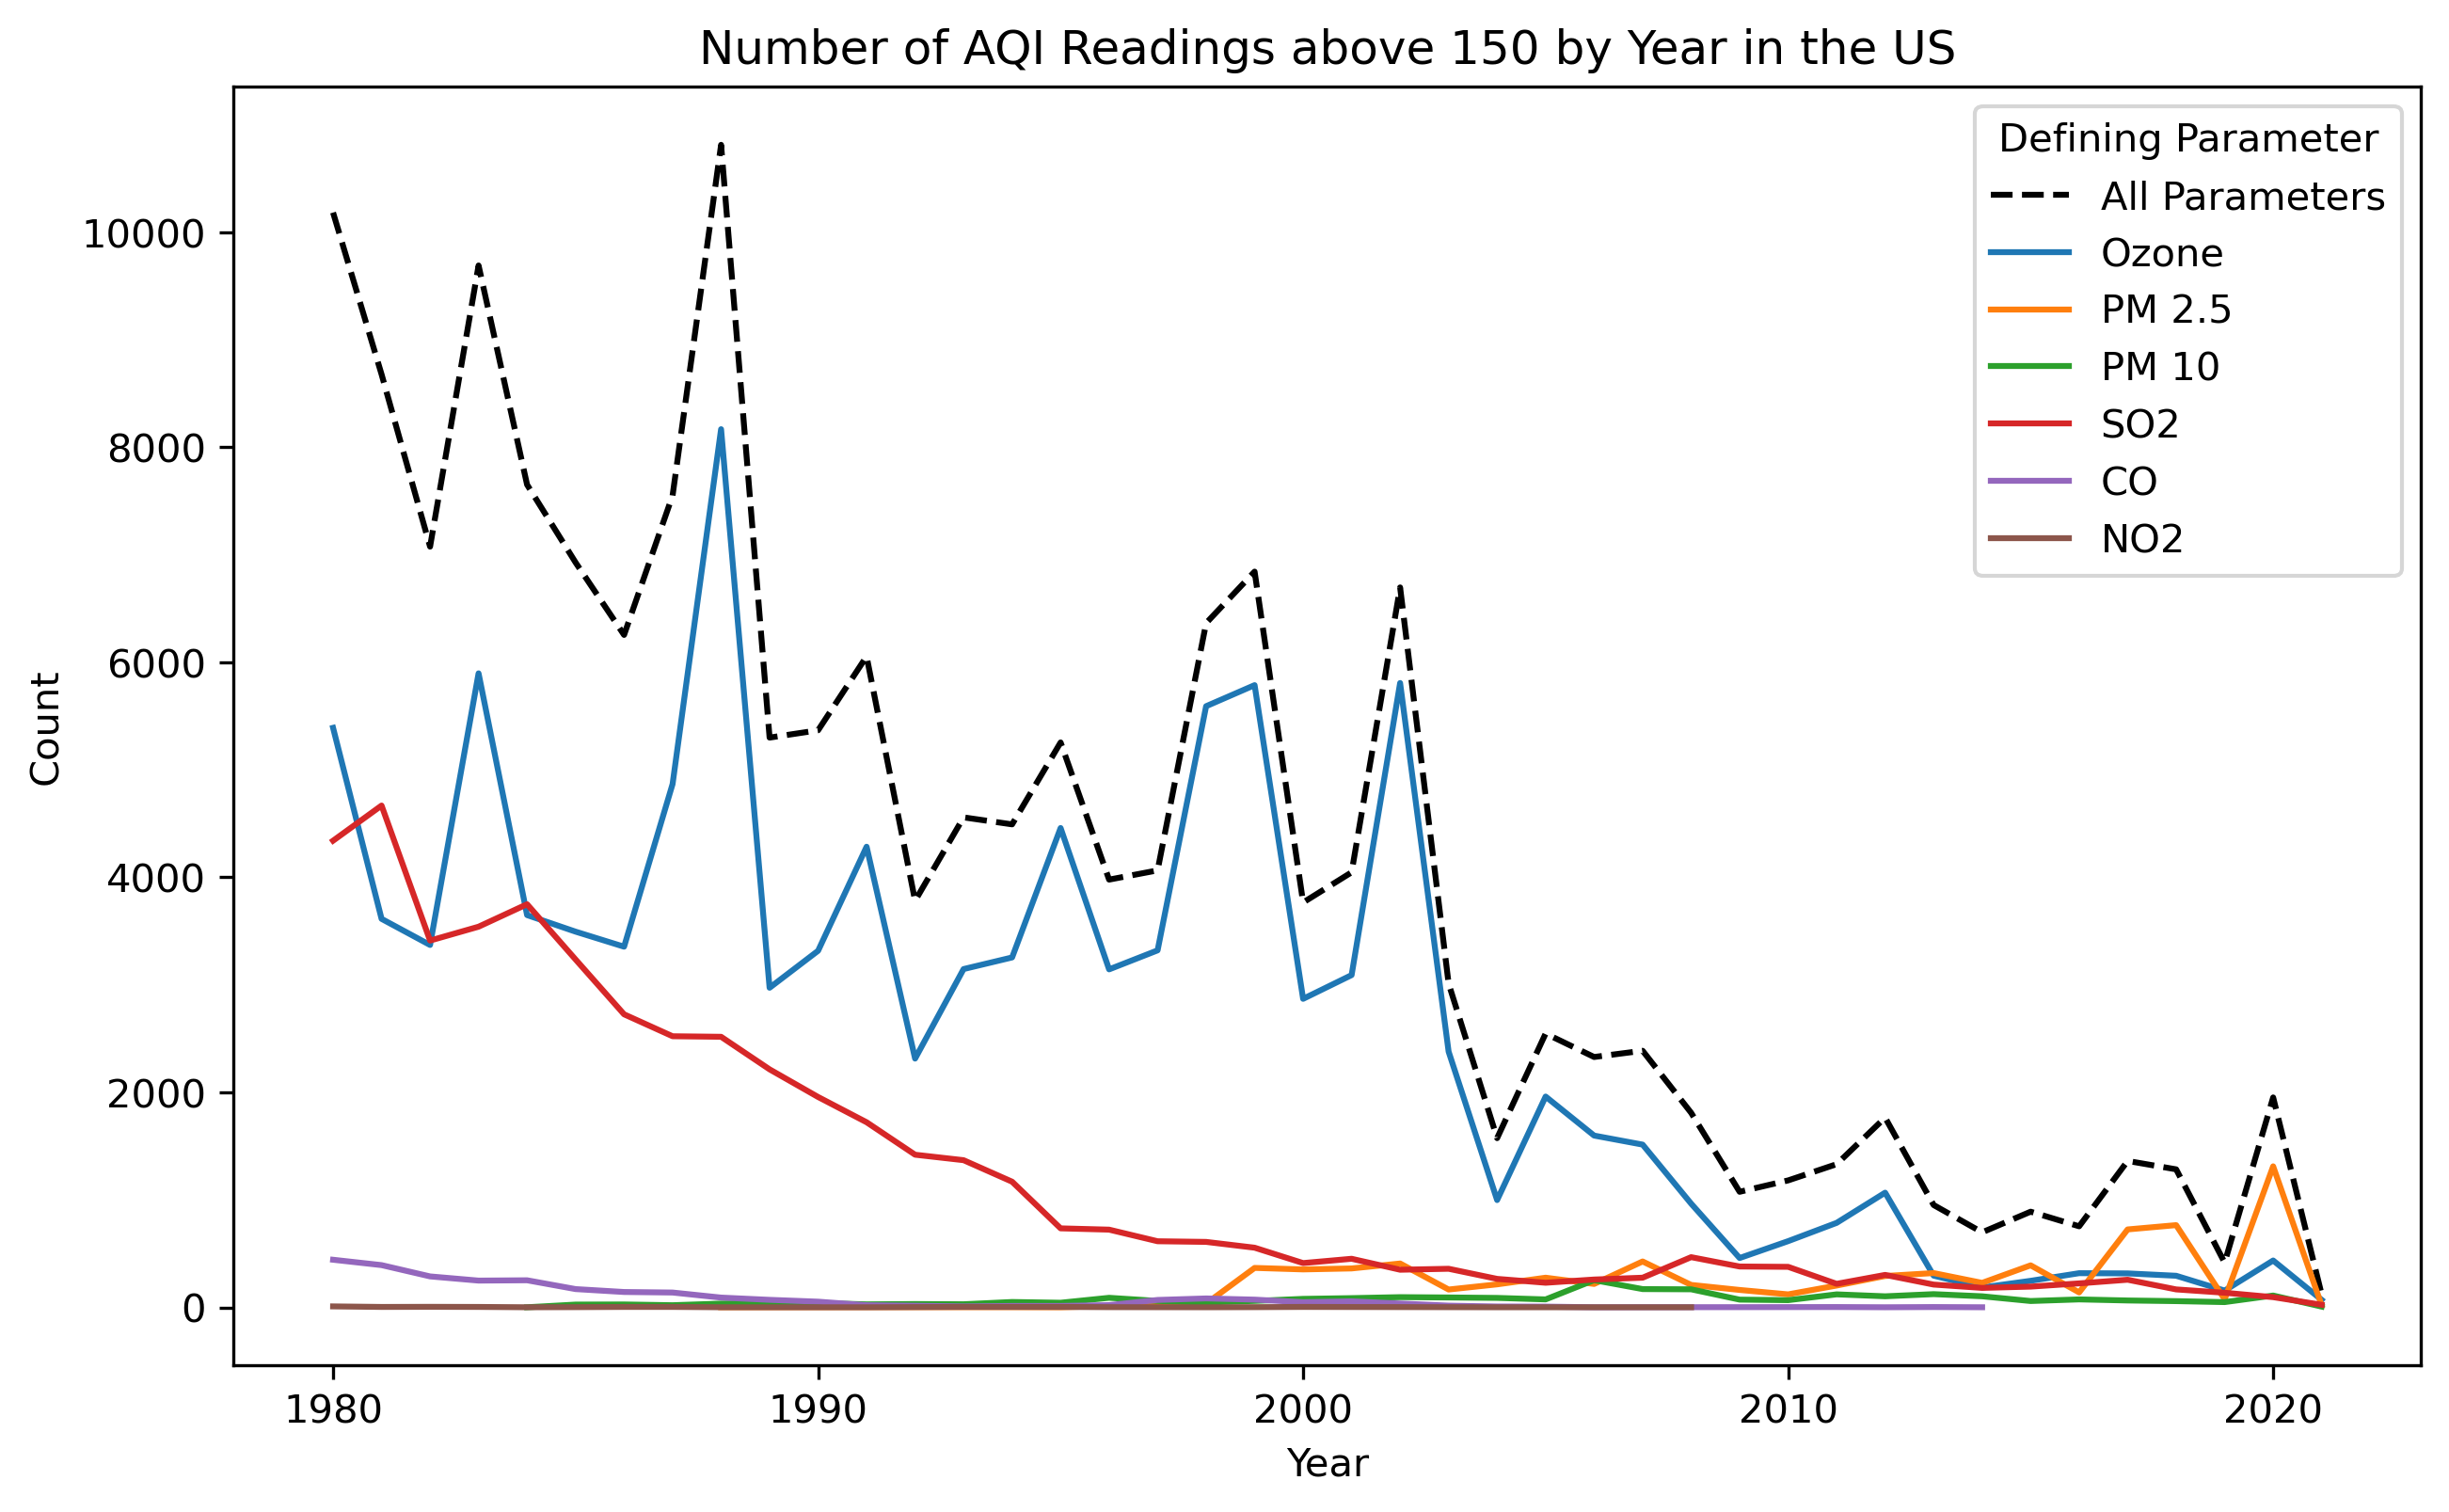

In [27]:
fig, ax = plt.subplots(figsize=(10,6), dpi = 300)

plt.plot(counts_aqi_unhealthy['year'], counts_aqi_unhealthy['count'],
         label = 'All Parameters', ls = 'dashed', color = 'black')
plt.plot(counts_ozone_unhealthy['year'], counts_ozone_unhealthy['count'],
         label = 'Ozone')
plt.plot(counts_pm25_unhealthy['year'], counts_pm25_unhealthy['count'],
         label = 'PM 2.5')
plt.plot(counts_pm10_unhealthy['year'], counts_pm10_unhealthy['count'],
         label = 'PM 10')
plt.plot(counts_so2_unhealthy['year'], counts_so2_unhealthy['count'],
         label = 'SO2')
plt.plot(counts_co_unhealthy['year'], counts_co_unhealthy['count'],
         label = 'CO')
plt.plot(counts_no2_unhealthy['year'], counts_no2_unhealthy['count'],
         label = 'NO2')

ax.legend(title = 'Defining Parameter')
plt.title('Number of AQI Readings above 150 by Year in the US')
plt.xlabel('Year')
plt.ylabel('Count')

## Number of AQI Readings above 150 by Year in California

In [28]:
aqi_unhealthy_ca = aqi_unhealthy[aqi_unhealthy['State Name'] == 'California']

In [31]:
ozone_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'Ozone']
pm25_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'PM2.5']
pm10_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'PM10']
so2_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'SO2']
co_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'CO']
no2_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'NO2']

In [34]:
counts_aqi_unhealthy_ca = aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')
counts_ozone_unhealthy_ca = ozone_unhealthy_ca.groupby('year').size().reset_index(name='count')
counts_pm25_unhealthy_ca = pm25_unhealthy_ca.groupby('year').size().reset_index(name='count')
counts_pm10_unhealthy_ca = pm10_unhealthy_ca.groupby('year').size().reset_index(name='count')
counts_so2_unhealthy_ca = so2_unhealthy_ca.groupby('year').size().reset_index(name='count')
counts_co_unhealthy_ca = co_unhealthy_ca.groupby('year').size().reset_index(name='count')
counts_no2_unhealthy_ca = no2_unhealthy_ca.groupby('year').size().reset_index(name='count')

Text(0, 0.5, 'Count')

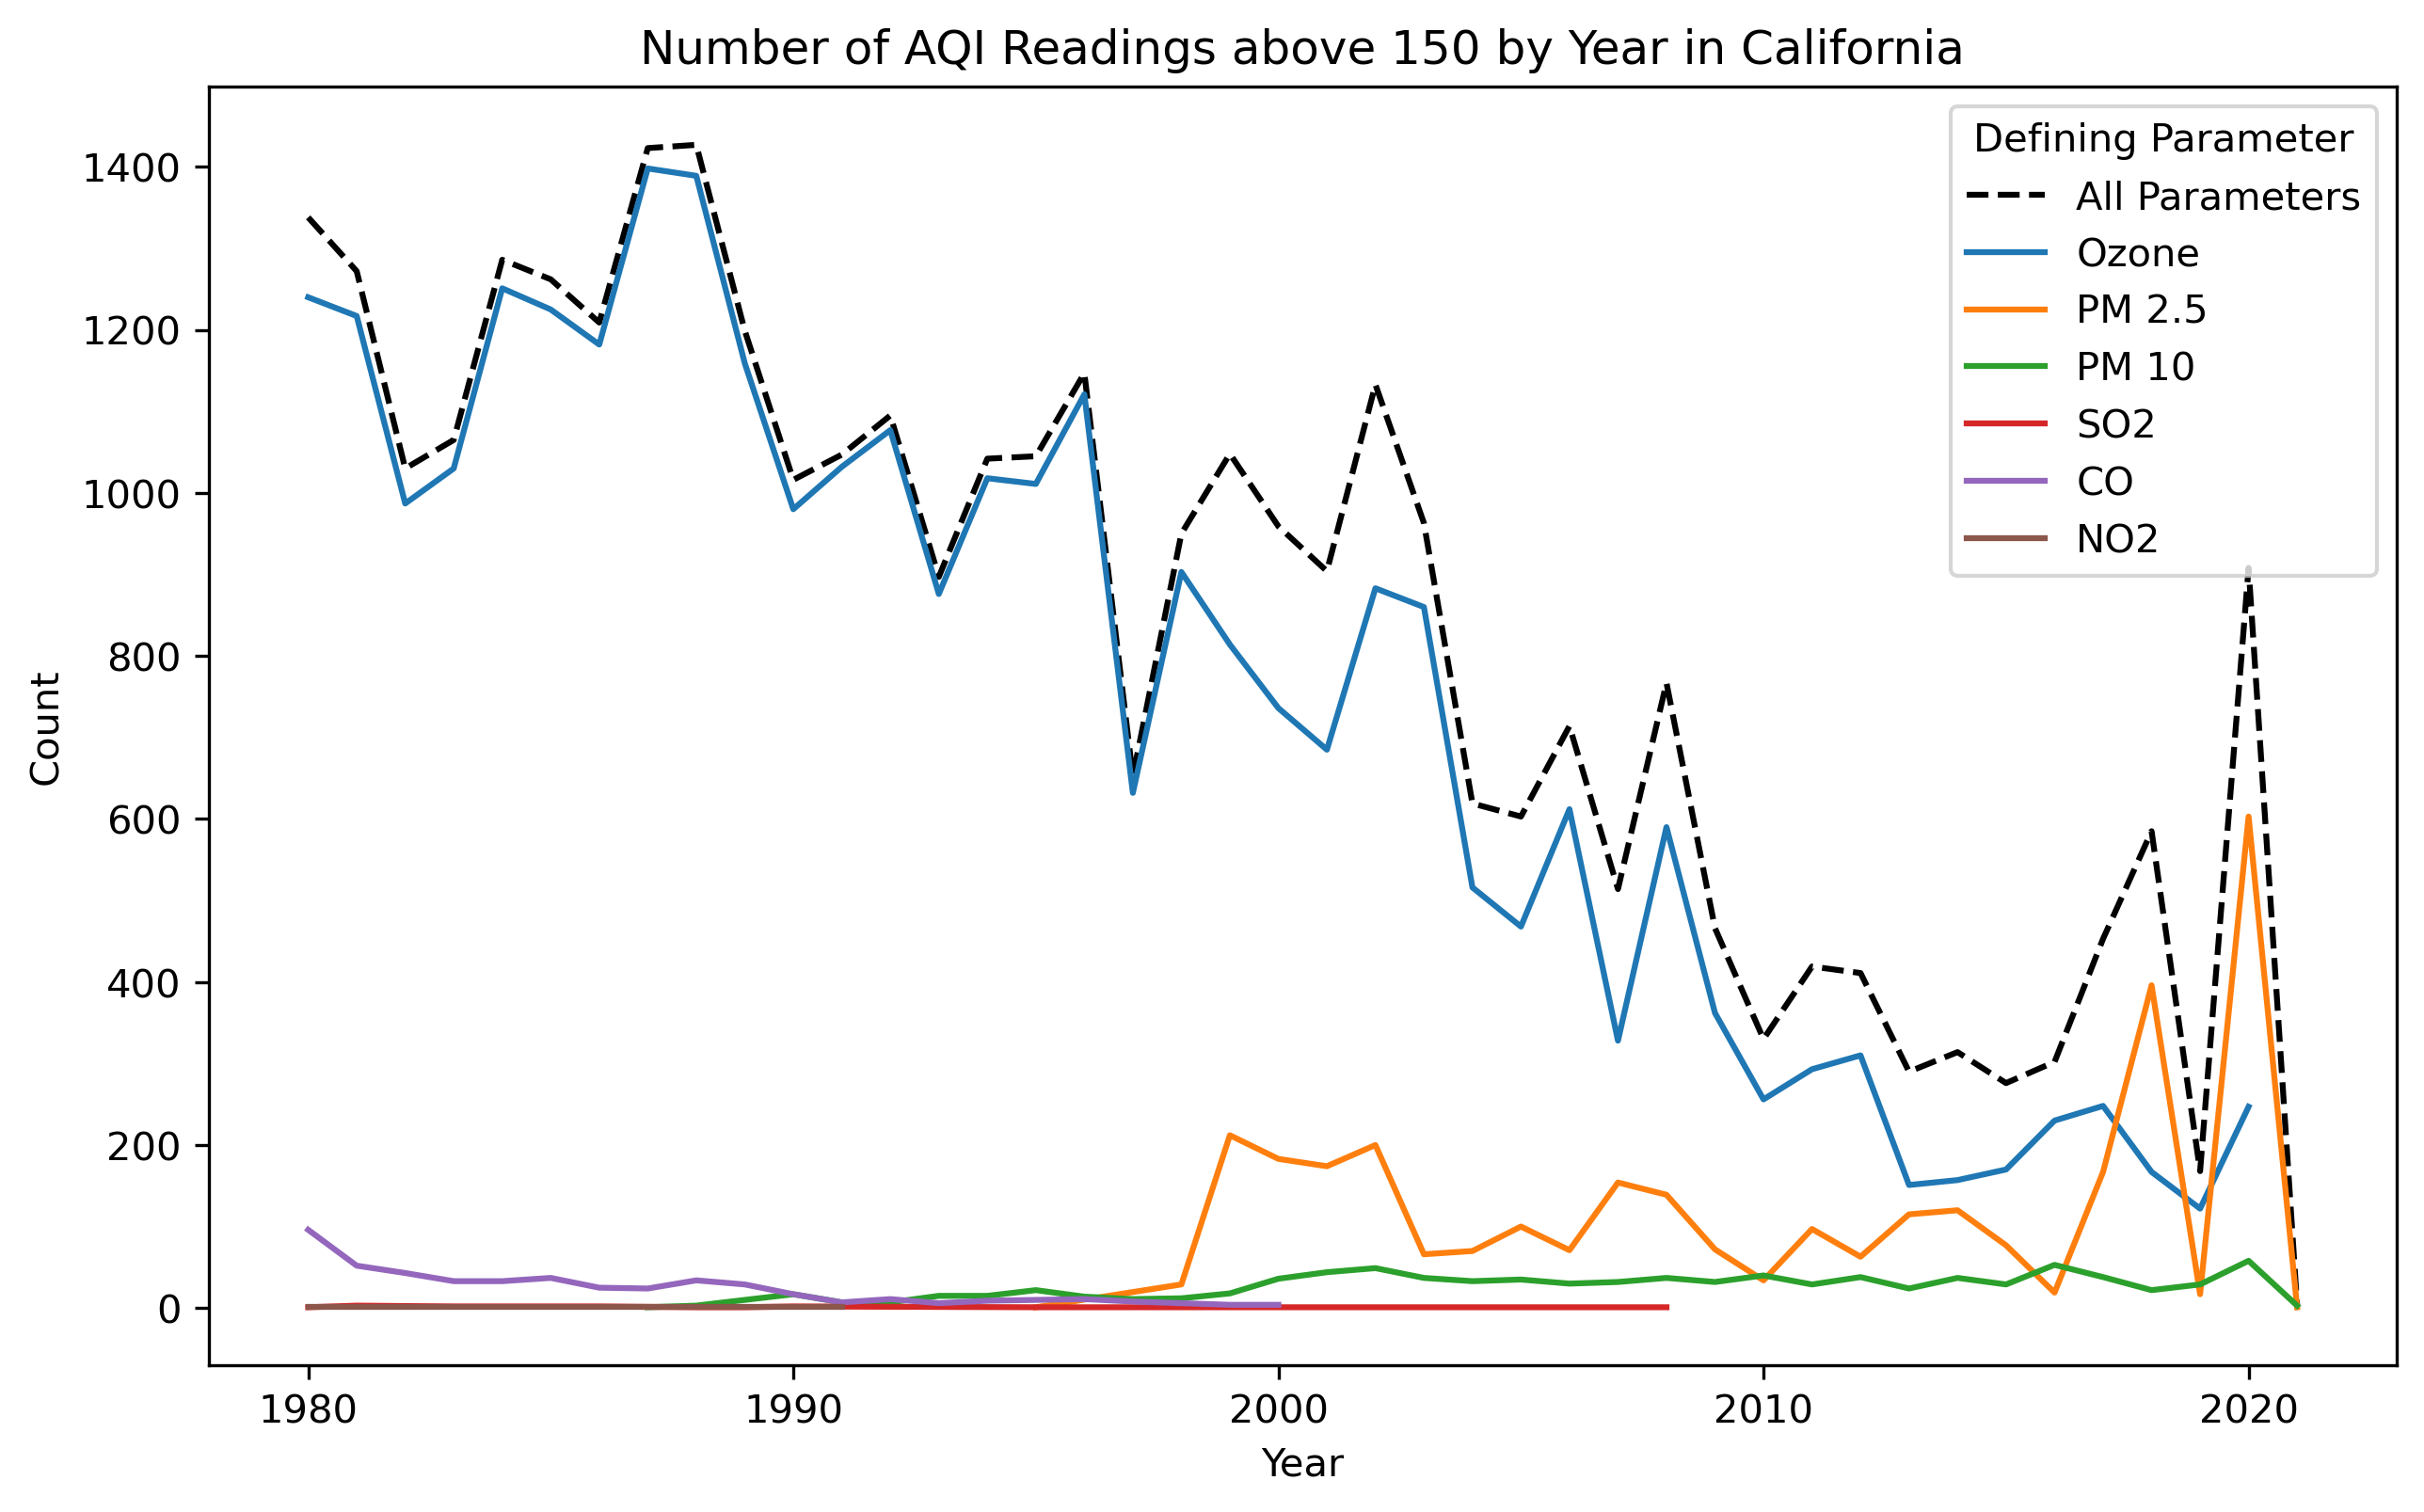

In [35]:
fig, ax = plt.subplots(figsize=(10,6), dpi = 300)

plt.plot(counts_aqi_unhealthy_ca['year'], counts_aqi_unhealthy_ca['count'],
         label = 'All Parameters', ls = 'dashed', color = 'black')
plt.plot(counts_ozone_unhealthy_ca['year'], counts_ozone_unhealthy_ca['count'],
         label = 'Ozone')
plt.plot(counts_pm25_unhealthy_ca['year'], counts_pm25_unhealthy_ca['count'],
         label = 'PM 2.5')
plt.plot(counts_pm10_unhealthy_ca['year'], counts_pm10_unhealthy_ca['count'],
         label = 'PM 10')
plt.plot(counts_so2_unhealthy_ca['year'], counts_so2_unhealthy_ca['count'],
         label = 'SO2')
plt.plot(counts_co_unhealthy_ca['year'], counts_co_unhealthy_ca['count'],
         label = 'CO')
plt.plot(counts_no2_unhealthy_ca['year'], counts_no2_unhealthy_ca['count'],
         label = 'NO2')

ax.legend(title = 'Defining Parameter')
plt.title('Number of AQI Readings above 150 by Year in California')
plt.xlabel('Year')
plt.ylabel('Count')

## What are the actual readings of AQI above 150 in California?

In [17]:
aqi_ca = aqi[aqi['State Name'] == 'California']
aqi_ca_pm25 = aqi_ca[aqi_ca['Defining Parameter'] == 'PM2.5']
aqi_ca_pm25['Year'] = pd.DatetimeIndex(aqi_ca_pm25['Date']).year
aqi_ca_pm25

<ipython-input-17-69665896aa38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_ca_pm25['Year'] = pd.DatetimeIndex(aqi_ca_pm25['Date']).year


,State Name,county Name,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year
2019,California,Colusa,2021-01-16,10,Good,PM2.5,06-011-0007,1,2021
2020,California,Colusa,2021-01-17,0,Good,PM2.5,06-011-0007,1,2021
2021,California,Colusa,2021-01-18,0,Good,PM2.5,06-011-0007,1,2021
2022,California,Colusa,2021-01-19,7,Good,PM2.5,06-011-0007,1,2021
2023,California,Colusa,2021-01-20,32,Good,PM2.5,06-011-0007,1,2021
...,...,...,...,...,...,...,...,...,...
9687510,California,San Benito,1988-03-12,41,Good,PM2.5,06-069-0003,1,1988
9687678,California,San Benito,1988-08-27,47,Good,PM2.5,06-069-0003,2,1988
9687780,California,San Benito,1988-12-07,42,Good,PM2.5,06-069-0003,2,1988
9687876,California,San Bernardino,1988-03-12,59,Moderate,PM2.5,06-071-9010,12,1988


(0.0, 600.0)

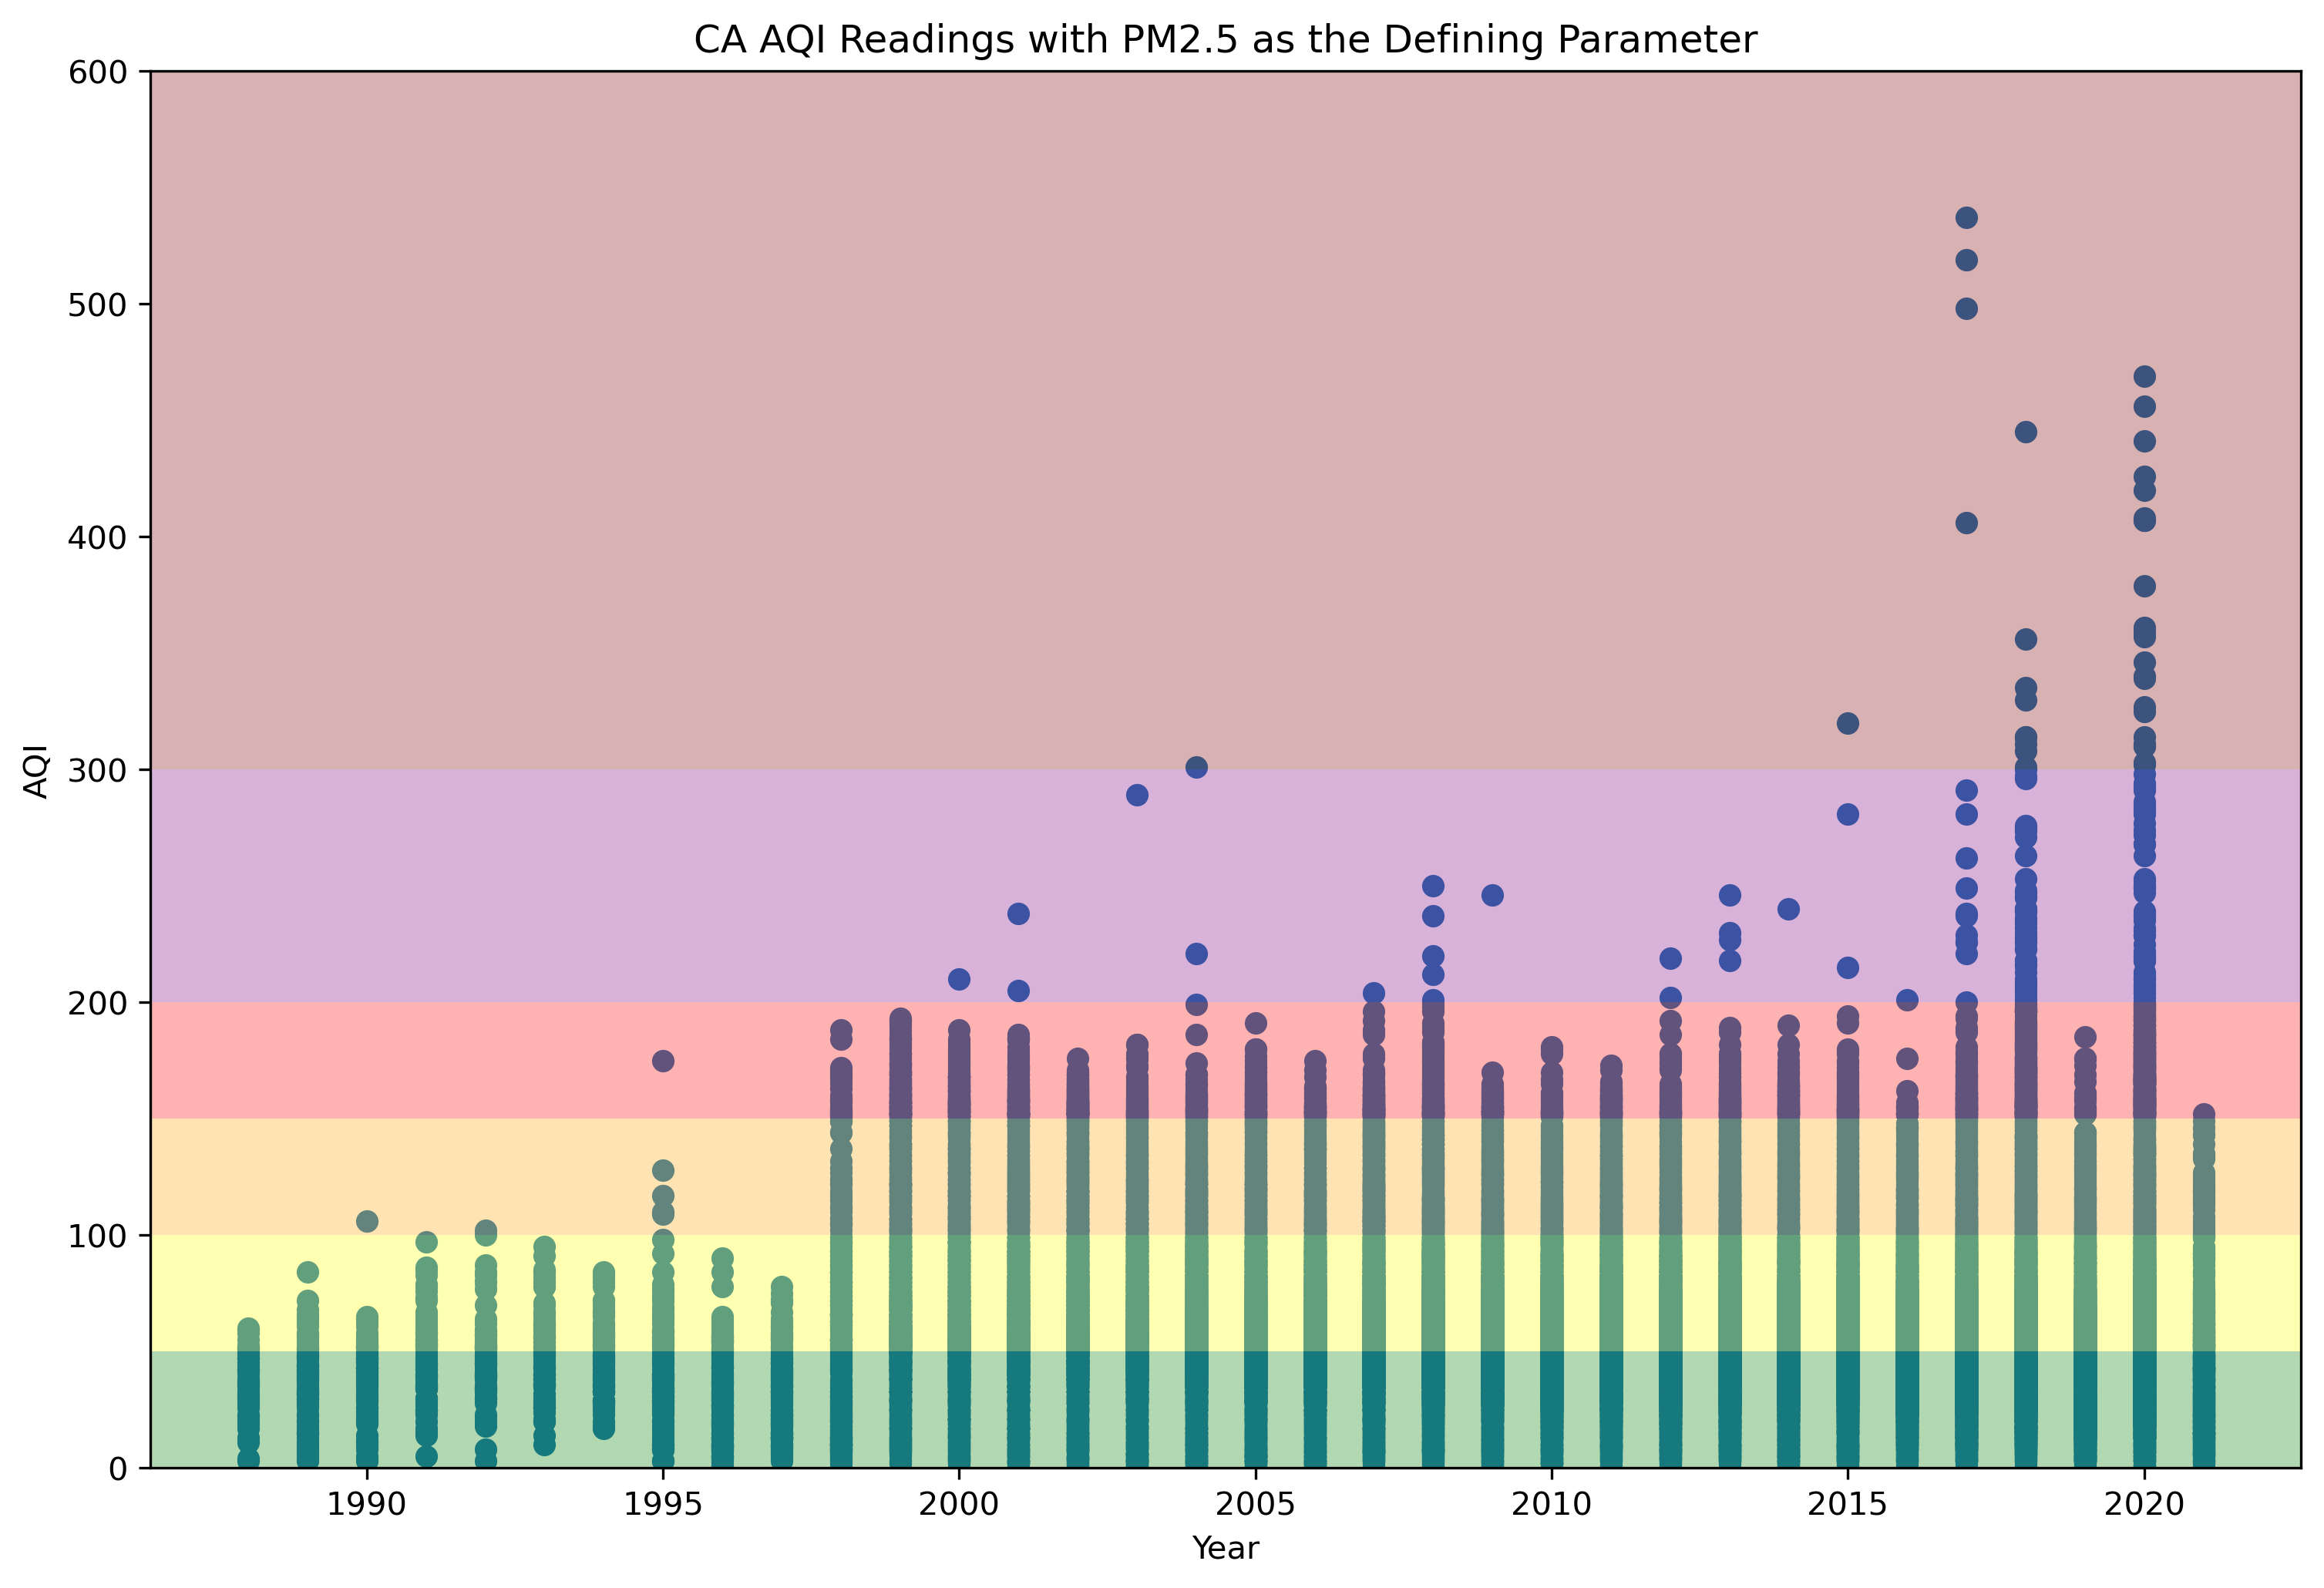

In [40]:
fig, ax = plt.subplots(figsize = (12,8), dpi = 300)

ax.axhspan(0, 50, facecolor='green', alpha=0.3)
ax.axhspan(50, 100, facecolor='yellow', alpha=0.3)
ax.axhspan(100, 150, facecolor='orange', alpha=0.3)
ax.axhspan(150, 200, facecolor='red', alpha=0.3)
ax.axhspan(200, 300, facecolor='purple', alpha=0.3)
ax.axhspan(300, 600, facecolor='maroon', alpha=0.3)

plt.scatter(aqi_ca_pm25['Year'], aqi_ca_pm25['AQI'])
plt.ylim(0,600)
plt.title("CA AQI Readings with PM2.5 as the Defining Parameter")
plt.xlabel("Year")
plt.ylabel("AQI")

## Now for just California

In [13]:
aqi_unhealthy_ca = aqi_unhealthy[aqi_unhealthy['State Name'] == 'California']
#aqi_unhealthy_ca.head()

In [14]:
counts_aqi_unhealthy_ca = aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')

<AxesSubplot:title={'center':'Number of Days with an AQI above 150 in CA \nfrom 1980-2021'}, xlabel='year'>

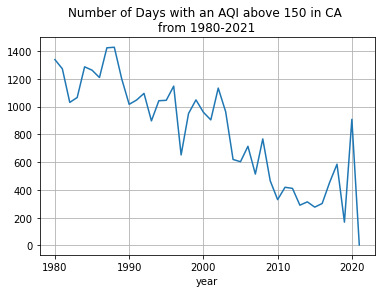

In [15]:
counts_aqi_unhealthy_ca.plot(x = 'year', 
                          y = 'count', 
                          legend = False, 
                          grid = True, 
                          title = 'Number of Days with an AQI above 150 in CA \nfrom 1980-2021')

## Now for Colorado

In [16]:
aqi_unhealthy_ca = aqi_unhealthy[aqi_unhealthy['State Name'] == 'Colorado']

In [17]:
counts_aqi_unhealthy_ca = aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')

<AxesSubplot:title={'center':'Number of Days with an AQI above 150 in Colorado \nfrom 1980-2021'}, xlabel='year'>

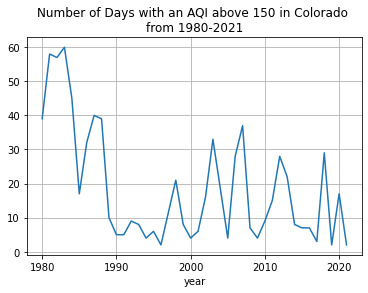

In [18]:
counts_aqi_unhealthy_ca.plot(x = 'year', 
                          y = 'count', 
                          legend = False, 
                          grid = True, 
                          title = 'Number of Days with an AQI above 150 in Colorado \nfrom 1980-2021')

## Let's see what the trend is in New York

<AxesSubplot:title={'center':'Number of Days with an AQI above 150 in New York \nfrom 1980-2021'}, xlabel='year'>

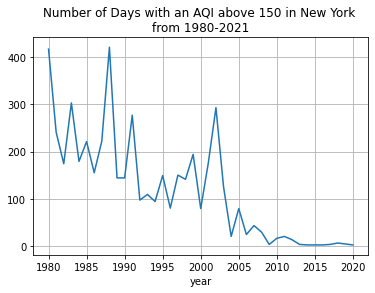

In [19]:
aqi_unhealthy_ca = aqi_unhealthy[aqi_unhealthy['State Name'] == 'New York']
counts_aqi_unhealthy_ca = aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')
counts_aqi_unhealthy_ca.plot(x = 'year', 
                          y = 'count', 
                          legend = False, 
                          grid = True, 
                          title = 'Number of Days with an AQI above 150 in New York \nfrom 1980-2021')